In [ ]:
import nltk
from textblob import TextBlob

### Using TextBlob to calculte sentiment

#### Positive Test

In [ ]:
string1 = "You are a great person"

In [ ]:
blob1 = TextBlob(string1)

In [ ]:
blob1.sentiment

#### Negative Test

In [ ]:
string2 = "These are horrible times"
blob2 = TextBlob(string2)
blob2.sentiment

### Mixture test

In [ ]:
string3 = "You are a bad person, but you are also my brother, therefore I love you"

In [ ]:
blob3 = TextBlob(string3)
blob3.sentiment

# Reddit

In [2]:
import praw

In [3]:
reddit = praw.Reddit('test-bot')

In [4]:
subreddit = reddit.subreddit("ffxiv")

In [ ]:
test_sub = subreddit.hot(limit=5)

In [ ]:
test = test_sub.next()

In [ ]:
for post in test_sub:
    print("------------------")
    print("Title: ", post.title)
    print("Text: ", post.selftext)
    print("Author: ", post.author)
    print("Score: ", post.score)

## Comments

In [21]:
import nltk
from textblob import TextBlob
import pandas as pd
import time
import praw

In [30]:
reddit = praw.Reddit('test-bot')

In [31]:
subreddit = reddit.subreddit("politics")

In [32]:
results = pd.DataFrame(columns=['Comment_ID', 'Body', 'Controversiality', 'Comment_Date',
                                'Comment_Score', 'Polarity', 'Subjectivity',
                                'Author', 'Author_flair_text', 'Author_LKarma', 'Author_CKarma', 'Author_Date',
                                'Submission_ID', 'Submission_title', 'Submission_Date',
                                'Submission_Title_Polarity', 'Submission_Title_Subjectivity',
                                'Submission_Score', 'Submission_Author', 'Submission_Author_LKarma',
                                'Submission_Author_CKarma', 'Submission_Author_Date', 'Subreddit',
                                ])

In [33]:
i = len(results)
for comment_tracker in subreddit.stream.comments():
    
    comment_sentiment = TextBlob(comment_tracker.body).sentiment
    thread_title_sentimet = TextBlob(comment_tracker.submission.title).sentiment
    
    if comment_sentiment[0] < 0.2:
        print("Found a negative comment")
        results.loc[i, 'Comment_ID'] = comment_tracker.id
        results.loc[i, 'Body'] = comment_tracker.body
        results.loc[i, 'Controversiality'] = comment_tracker.controversiality
        results.loc[i, 'Comment_Date'] = comment_tracker.created_utc
        results.loc[i, 'Comment_Score'] = comment_tracker.score
        results.loc[i, 'Polarity'] = comment_sentiment[0]
        results.loc[i, 'Subjectivity'] = comment_sentiment[1]
                
        results.loc[i, 'Author'] = comment_tracker.author.name
        results.loc[i, 'Author_flair_text'] = comment_tracker.author_flair_text
        results.loc[i, 'Author_LKarma'] = comment_tracker.author.link_karma
        results.loc[i, 'Author_CKarma'] = comment_tracker.author.comment_karma
        results.loc[i, 'Author_Date'] = comment_tracker.author.created_utc
        
        results.loc[i, 'Submission_ID'] = comment_tracker.submission.id
        results.loc[i, 'Submission_title'] = comment_tracker.submission.title
        results.loc[i, 'Submission_Date'] = comment_tracker.submission.created_utc
        results.loc[i, 'Submission_Title_Polarity'] = thread_title_sentimet[0]
        results.loc[i, 'Submission_Title_Subjectivity'] = thread_title_sentimet[1]
        results.loc[i, 'Submission_Score'] = comment_tracker.submission.score
        
        results.loc[i, 'Submission_Author'] = comment_tracker.submission.author
        results.loc[i, 'Submission_Author_LKarma'] = comment_tracker.submission.author.link_karma
        results.loc[i, 'Submission_Author_CKarma'] = comment_tracker.submission.author.comment_karma
        results.loc[i, 'Submission_Author_Date'] = comment_tracker.submission.author.created_utc
        results.loc[i, 'Subreddit'] = comment_tracker.subreddit.display_name
        
        i += 1
        if i > 30:
            break

Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment


In [35]:
results.head()

,Comment_ID,Body,Controversiality,Comment_Date,Comment_Score,Polarity,Subjectivity,Author,Author_flair_text,Author_LKarma,...,Submission_title,Submission_Date,Submission_Title_Polarity,Submission_Title_Subjectivity,Submission_Score,Submission_Author,Submission_Author_LKarma,Submission_Author_CKarma,Submission_Author_Date,Subreddit
0,em5w8wc,"It ain't me, it ain't me, I ain't no Senator's...",0,1.55665e+09,1,0,0,radiofever,None,202,...,Rick Scott calls for U.S. military interventio...,1.55665e+09,-0.1,0.1,1,skye_kunhavigi,11127,45,1.55598e+09,politics
1,em5w8xr,How are suicides caused by excessive gun owner...,0,1.55665e+09,1,-0.25,1,YotaIamYourDriver,None,1245,...,It’s no coincidence the synagogue shooter post...,1.55664e+09,0,0,1049,Hoxha_Posadist,233959,39142,1.53288e+09,politics
2,em5w8zt,Once we impeach Barr we can impeach Trump and ...,0,1.55665e+09,1,0,0,KEK2020,:flag-us: America,27,...,Bill Barr could well be the most odious of Don...,1.55664e+09,0.5,0.5,440,ToughPack19,493,61,1.53304e+09,politics
3,em5w93i,Privatized proxy war is a bad idea.,0,1.55665e+09,1,-0.7,0.666667,abelabelabel,None,1179,...,Exclusive - Blackwater founder’s latest sales ...,1.55665e+09,0.5,0.9,11,casualphilosopher1,394247,82169,1.53226e+09,politics
4,em5w94g,We don't call everyone racist.,0,1.55665e+09,1,0,0,superluminal-driver,:flag-mi: Michigan,69,...,It’s no coincidence the synagogue shooter post...,1.55664e+09,0,0,1050,Hoxha_Posadist,233960,39142,1.53288e+09,politics


In [37]:
import seaborn as sns

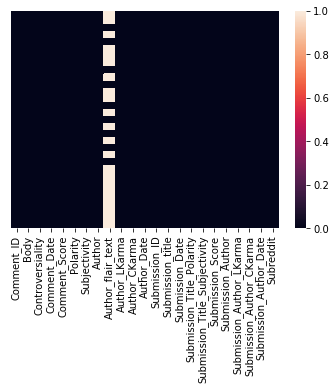

In [38]:
sns.heatmap(results.isnull(), yticklabels=False)